Beberapa bagian dari modul ini diambil dari kaggle: star categorization giants and dwarf dan materi dari CDT-DIS Machine learning in Big Data

Dalam sesi ini kita akan membahas sedikit mengenai pembelajaran mesin, atau dalam bahasa Inggrisnya, machine learning.

Apa itu pembelajaran mesin?

Pembelajaran mesin adalah metode untuk memecahkan masalah komputasional yang sulit bagi manusia untuk diselesaikan, tetapi bisa diselesaikan mesin secara cepat, contohnya seperti problem yang dideskripsikan dengan hukum-hukum matematika.

Pada pembelajaran mesin, kita membuat komputer belajar dari pengalamannya dan untuk membangun pemahaman dunia dengan hierarki konsep-konsep.

Oleh karena itu kita memerlukan banyak data agar mesin dapat belajar

Pembelajaran mesin dapat digunakan untuk:
*   Pengenalan pola
*   Klasifikasi
*   Prediksi
*   Peramalan (forecasting)
*   Optimisasi


**Penggunaan pembelajaran mesin**

**Prediksi**: Memprediksi keluaran dari data yang diberikan

**Inferensi**: Memahami data dan distribusi data dengan lebih baik

Data direpresentasikan dalam bentuk "fitur-fitur" yang diekstrak dari data mentah untuk dipelajari oleh algoritma kita untuk dipelajari.

Contoh fitur:
citra: sudut, tepi, tekstur, warna

teks: frekuensi kata-kata, rangkaian kata

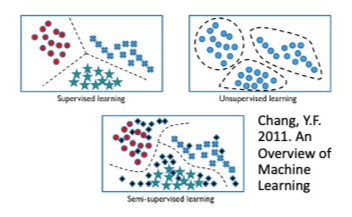

Pada pembelajaran mesin, ada tiga mode pembelajaran:
1. Pembelajaran tersupervisi/ supervised learning: belajar memprediksi keluaran dengan data pelatihan terlabeli
2. Pembelajaran nirsupervisi/ unsupervised learning: belajar mengelompokkan/ memprediksi keluaran tanpa pengetahuan tentang keluaran, membiarkan data merepresentasikan data tersebut sendiri
3. Pembelajaran semi-tersupervisi: belajar mengelompokkan/ memprediksi input dengan sedikit jumlah data pelatihan.



Pembelajaran mesin selalu berkembang, tapi kita bisa mengelompokkan metode:


*   Regresi: linear, logistik
*   kasus/ ukuran kesamaan: kNN, SOM
*   regularisasi: elasticNet, Lasso
*   Decision tree/ pohon keputusan: CART
*   Bayesian: Naive bayes
*   Clustering: k-Means
*   peraturan asosiasi: eclat
*   Artificial neural network/ jaringan syaraf tiruan: perceptron
*   Deep learning: CNN
*   dimensionality reduction/ pengurangan dimensi: PCA
*   ensembel/ gabungan: random forest
*   Vector machine: SVM




Orang-orang bilang bahwa saat ini adalah era "big data". Dengan jumlah data atmosfer dan keplanetan yang sangat banyak, menciptakan klasifier atau prediktor sebenarnya tidak sulit. Meski begitu, untuk memproduksi hasil yang reliabel, pembelajaran tersupervisi lebih disukai daripada pembelajaran nirsupervisi. Masalah yang sering terjadi adalah data yang terlabeli tidak terlalu banyak, termasuk untuk data atmosfer dan keplanetan.

Di bidang computer vision, di mana pembelajaran mesin sudah banyak digunakan, telah banyak dataset terstandarisasi, seperti ImageNet untuk Deteksi Obyek atau Yale Face Database untuk pengenalan muka. Di bidang Observasi Kebumian, beberapa dataset seperti Eurosat sudah dibuat.

Di sesi ini kalian akan bermain sedikit dengan metode pembelajaran mesin.

In [ ]:
#Memberi komentar pada kode kalian adalah kebiasaan yang baik
#bukan hanya pembaca yang akan berterima kasih, tapi juga kalian di masa depan

#Perintah ini diberi untuk menampakkan plot yang telah dibuat di layar utama
%matplotlib inline
#Sekarang kita memasukkan library, yang sudah diinstall oleh Google Colab, hanya kita singkat saja
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg


Karena kita menggunakan Google Colab, kita menggunakan Google Drive untuk menyimpan data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

#Enter, klik link, login ke akun Google kalian, kopi kode otorisasi

Mounted at /content/gdrive


In [ ]:
#Coba cek apa input/ output ke Google Drive sudah OK
with open('/content/gdrive/My Drive/bar.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/bar.txt
#Apa file sudah muncul di folder kalian (Muncul pesan "Hello Google Drive)? Kalau sudah, bisa dimulai!

Hello Google Drive!

In [ ]:
#Kita akan menggunakan scikit-learn, library pembelajaran mesin untuk Python
from sklearn import datasets

#Kita juga akan menggunakan seaborn untuk visualisasi dataframe dari "Panda"
import seaborn as sns


In [ ]:
#download datanya (otomatis atau manual, sekarang manual dulu)
#download file di https://www.dropbox.com/transfer/AAAAALzquAntK42inFp7u2NmLf__dh1wWslLCdq_MiiD3AiJnswnNB0
#lalu upload ke google drive
starlist = pd.read_csv('/content/gdrive/My Drive/Star3642_balanced.csv')
starlist

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


Dapat dilihat dari bentuk data kita, data kita terdiri dari 3642 bintang, dengan masing-masing memiliki 7 kolom.

Penjelasan masing-masing kolom

Vmag - Magnitudo Visual bintang

Plx - Jarak bintang - bumi

e_Plx - Standar deviasi error Plx (Bisa didrop kalau terlalu besar!)

B-V - Indeks warna B-V. (Bintang yang panas memiliki indeks warna B-V mendekati 0 atau negatif. Bintang yang dingin memiliki indeks warna B-V mendekati 2.0. Bintang lain memiliki nilai B-V di antara dua nilai tersebut)

SpType - Kelas klasifikasi bintang. (Angka romawi >IV giant/ raksasa. Selain itu adalah bintang deret utama)

Amag - Magnitudo mutlak/ absolut bintang

TargetClass - Apakah bintang tersebut Bintang deret utama/Dwarf (0) atau bintang raksasa/ Giant (1)

Di sini kita akan pakai data Magnitudo Absolut dan Indeks warna

In [ ]:
#pilih magnitudo absolut dan indeks warna, lalu target kelas
#Kalau mau latihan mandiri, bisa dicoba untuk variabel lain
df=starlist[['B-V', 'Amag', 'TargetClass']]
df

,B-V,Amag,TargetClass
0,1.318,16.678352,0
1,-0.045,15.518060,0
2,0.855,14.471813,0
3,-0.015,15.324928,1
4,0.584,19.401997,1
...,...,...,...
3637,1.786,14.856089,0
3638,0.408,17.314104,1
3639,1.664,13.029078,0
3640,0.210,16.408636,1


Kita lihat sekarang statistika dari data tersebut

In [ ]:
df.shape

(3642, 3)

In [ ]:
df.describe(include='all')

,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000
mean,0.827077,16.427388,0.500000
std,0.436699,2.428144,0.500069
min,-0.196000,2.820000,0.000000
25%,0.487250,15.150312,0.000000
50%,0.867000,16.392485,0.500000
75%,1.136000,18.029836,1.000000
max,2.530000,29.249165,1.000000


Kita lihat bahwa jumlah data adalah 3642, dan data semua terisi. Diketahui juga nilai mean, standar deviasi, minimum, maksimum, dam kuartil data

Dari tadi kita lihat data dalam bentuk tabel saja, mari kita tampilkan dalam bentuk grafik sehingga lebih mudah untuk dipahami

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


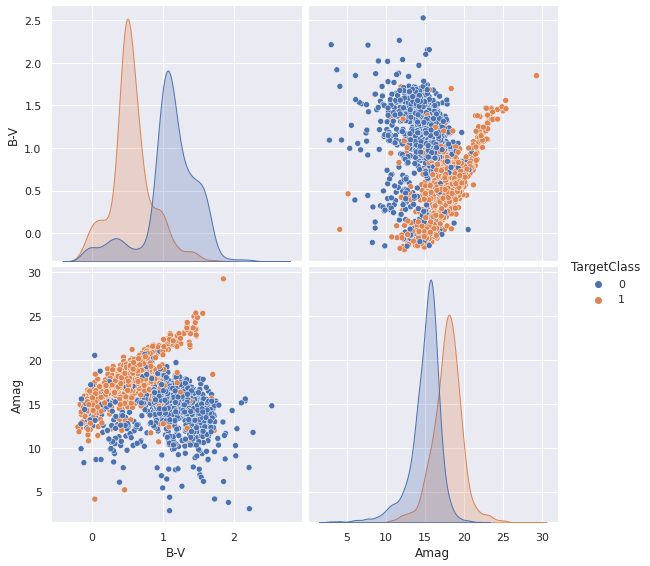

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df, hue='TargetClass', size=4)

Dapat terlihat dari grafik yang telah kalian buat, bintang dwarf dan giant terkelompokkan dalam dua kelas yang tidak terpisah secara sempurna. Nilai modus dari B-V dan Amag kedua kelas tersebut berbeda, tetapi banyak yang memiliki nilai yang beririsan.

Ada banyak algoritma pembelajaran mesin yang dapat digunakan untuk mengklasifikasi dataset kita ini ke beberapa kelas. Kamu dapat mencoba banyak metode klasifikasi dengan menggunakan  scikit-learn. Meski tanpa pengetahuan mengenai pembelajaran mesin, algoritma bisa dijalankan untuk mendapat hasil yang memuaskan. Meskipun begitu, pengetahuan yang lebih dalam mengenai data dan algoritma yang digunakan dapat menghasilkan hasil yang optimum.

Mari kita mencoba beberapa metode pembelajaran mesin. KNN (K-Nearest Neighbour), logistic regression (metode regresi linear), SVM (support vector machine), dan decision tree atau pohon keputusan.



Pada metode berdasarkan regresi linear, kamu mencoba untuk membagi datamu dengan menciptakan garis yang "terbaik" untuk memperoleh probabilitas maksimum untuk mengklasifikasikan data yang belum pernah dilihat oleh klasifier

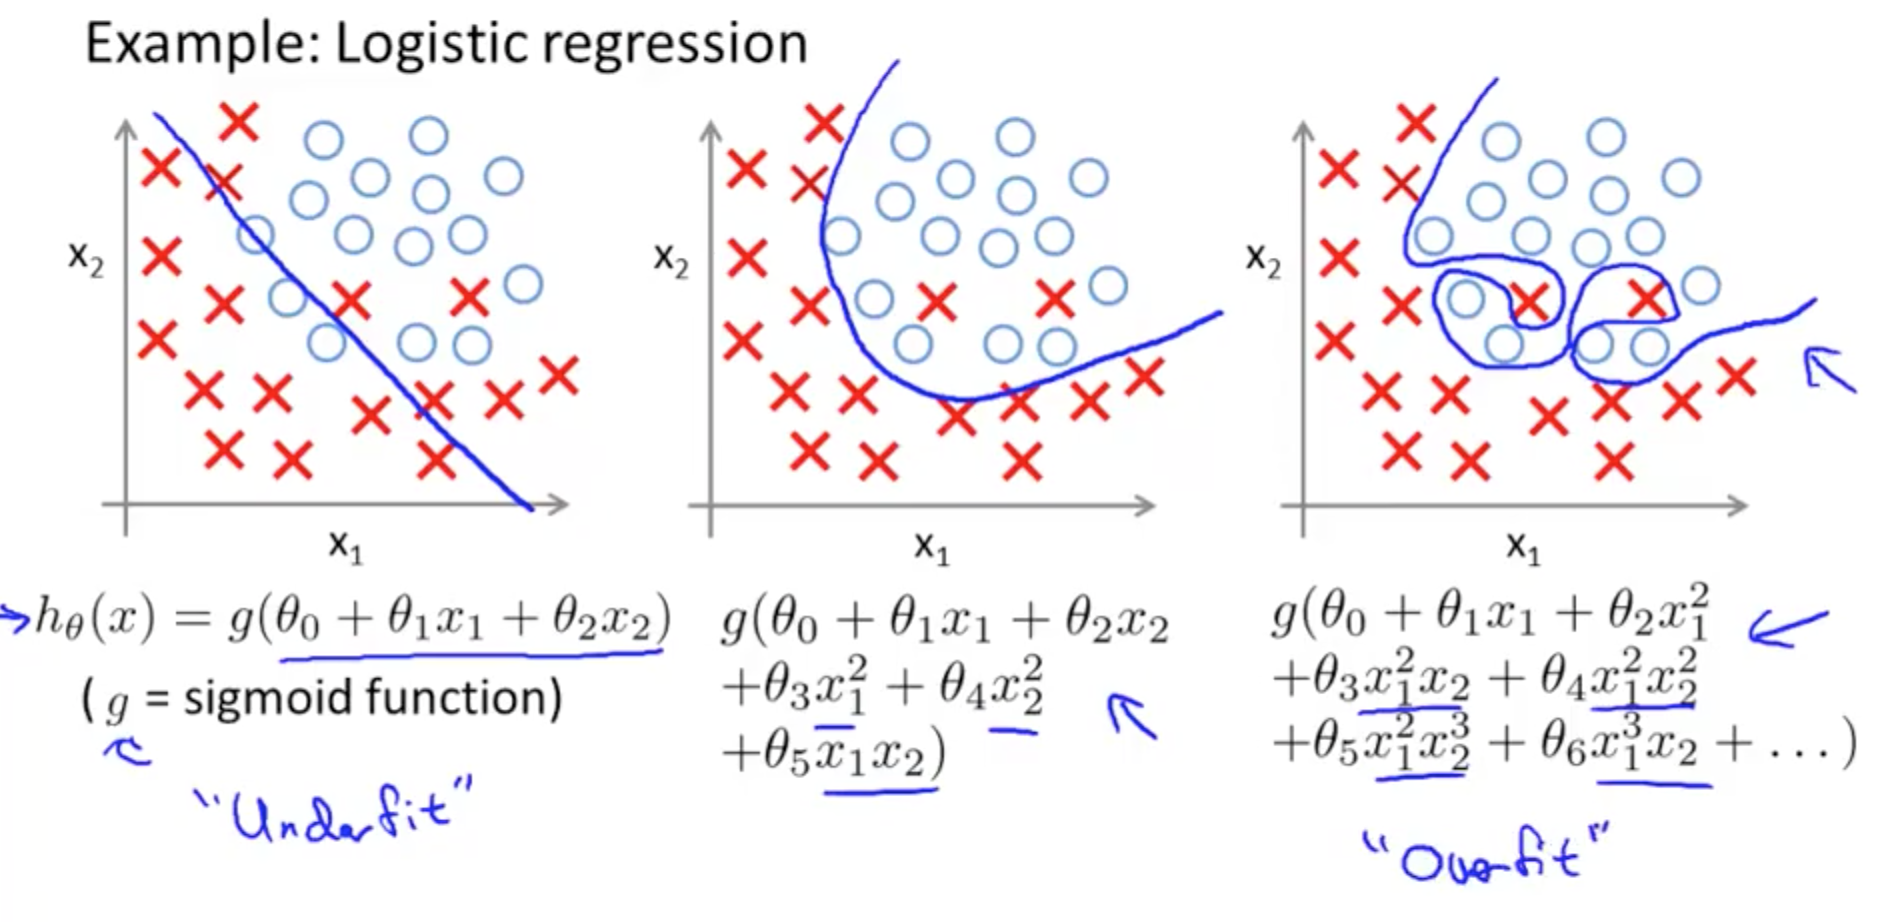

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


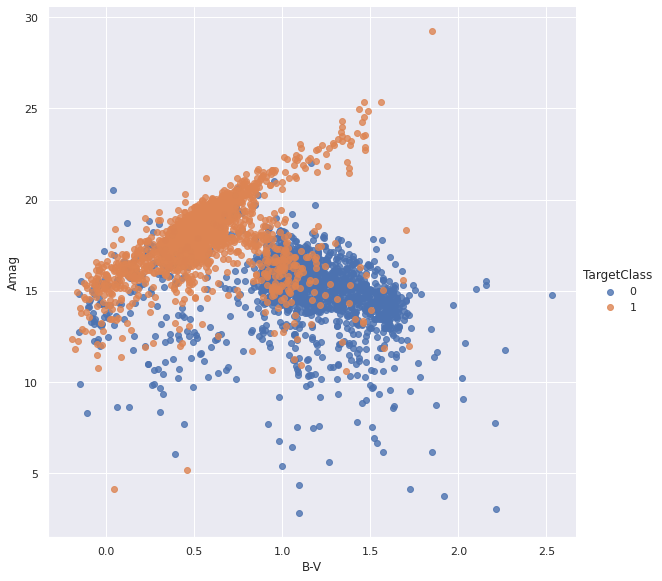

In [ ]:
#Mari definisikan data pelatihan dan tes
X_train = df.drop('TargetClass',axis='columns')
y_bintang = df['TargetClass']

sns_plot=sns.lmplot("B-V", "Amag", data=df, hue='TargetClass', fit_reg=False,height=8)

In [ ]:
#Mari kita menggunakan logistic regression untuk meprediksi data
from sklearn.linear_model import LogisticRegression
#Beri alternatif untuk mencoba model lain
logreg = LogisticRegression(C=1e5, solver='liblinear')
#Biasanya data dibagi ke dalam data pelatihan: data tes dengan rasio 7:3 atau 8:2, tapi mari kita pakai seluruh data kita untuk pelatihan
logreg.fit(X_train, y_bintang)
#Lalu untuk tes
y_logreg=logreg.predict(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


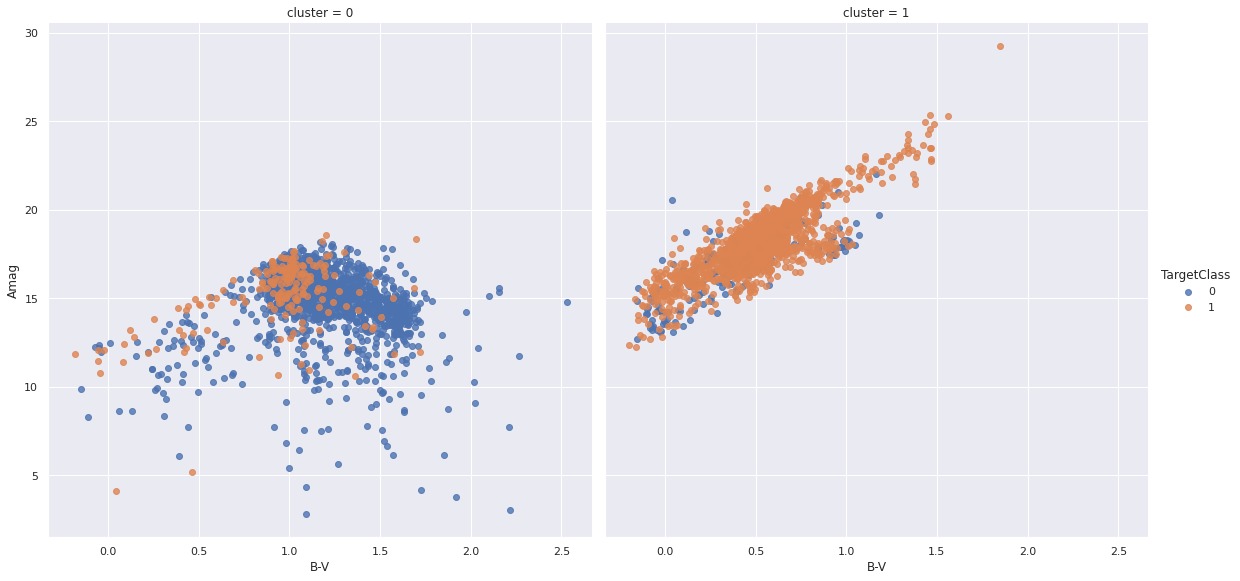

In [ ]:
#Mari kita tampilkan hasil pelatihan kita menggunakan logistic regression
df['cluster'] = y_logreg
sns_plot=sns.lmplot("B-V", "Amag", data=df, hue='TargetClass',
           col='cluster', fit_reg=False,height=8)

Dapat kita lihat dari grafik yang telah kita buat bahwa pembagian kita tidak terlalu baik.

Mari kita melakukan kuantifikasi hasilnya.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_bintang, y_logreg)*100)
print(confusion_matrix(y_bintang, y_logreg))
print(classification_report(y_bintang, y_logreg))

89.45634266886327
[[1633  188]
 [ 196 1625]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1821
           1       0.90      0.89      0.89      1821

    accuracy                           0.89      3642
   macro avg       0.89      0.89      0.89      3642
weighted avg       0.89      0.89      0.89      3642



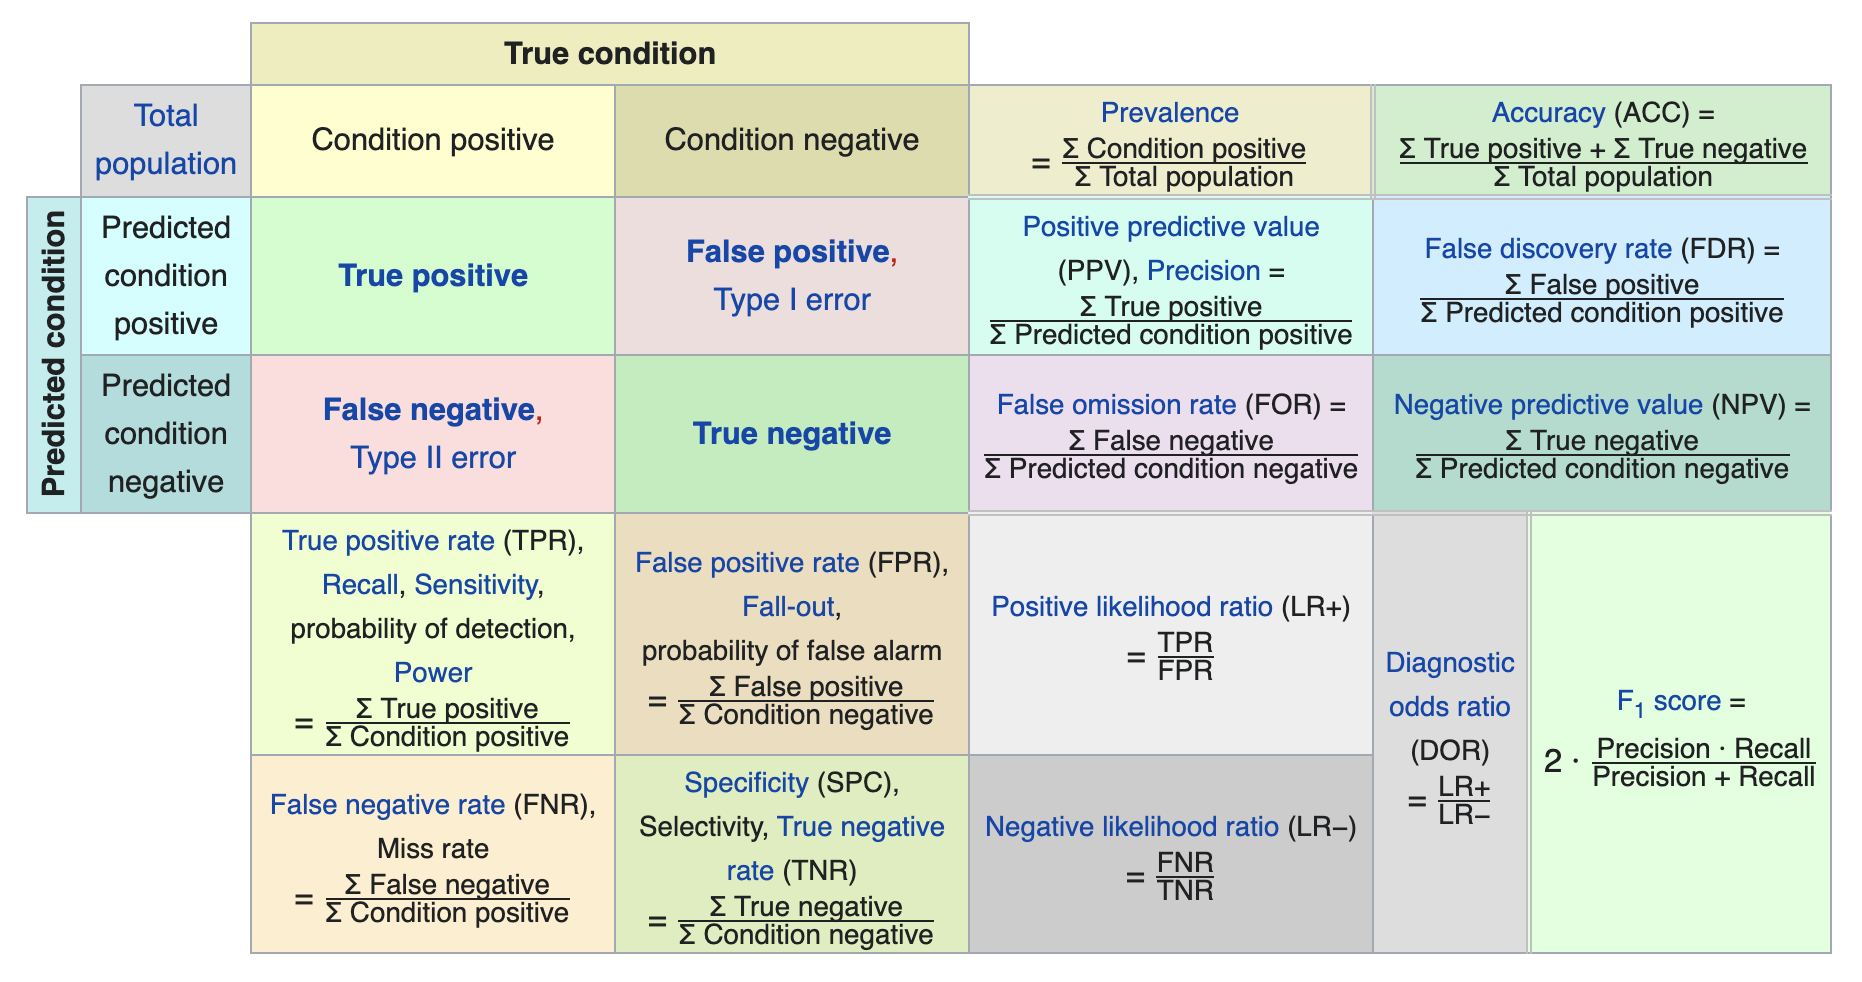



Dari klasifikasi yang kita lakukan, bisa dilihat kalau hasil klasifikasi kita cukup bagus tapi 10% data atau lebih masih tidak terklasifikasi dengan baik, sehingga seharusnya lebih baik lagi. Model yang lebih rumit atau data yang lebih representatif bisa digunakan.

Sekarang mari kita coba metode Pohon Keputusan atau Decision Tree.

Pohon keputusan bekerja dengan cara membagi data secara biner dalam kelompok-kelompok

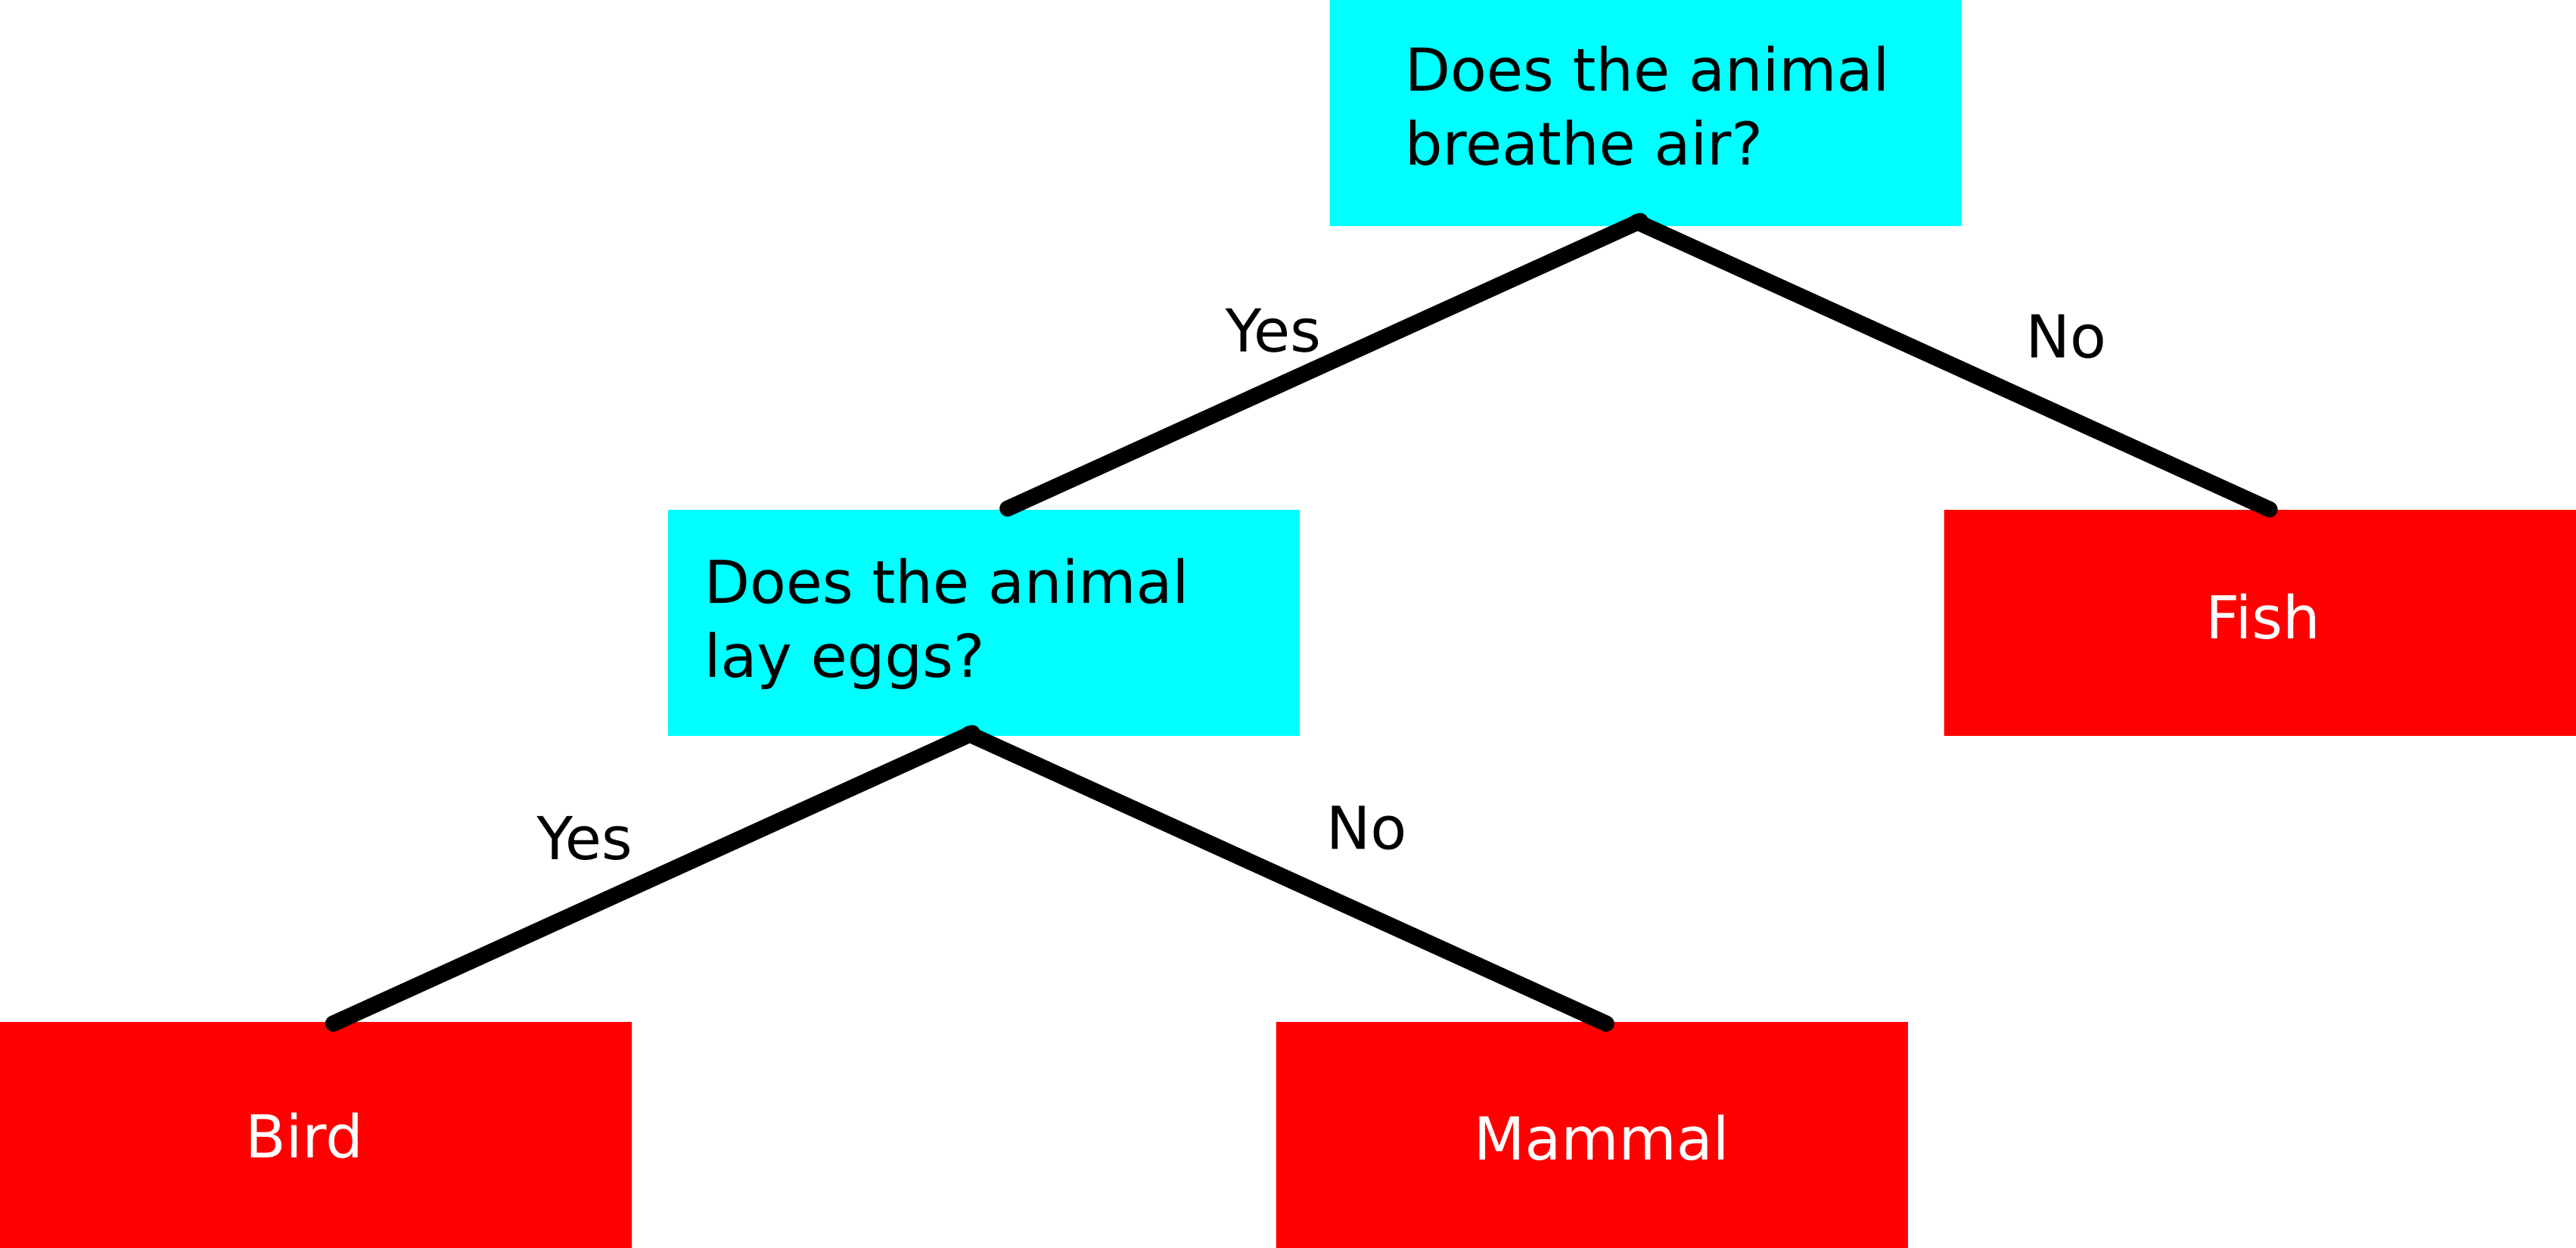

In [ ]:
#Import model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Kedalaman pohon, bisa kalian ubah. Mari kita coba 2 level
dt=DecisionTreeClassifier(max_depth=2)
dtree=dt.fit(X_train, y_bintang)
y_dt=dt.predict(X_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


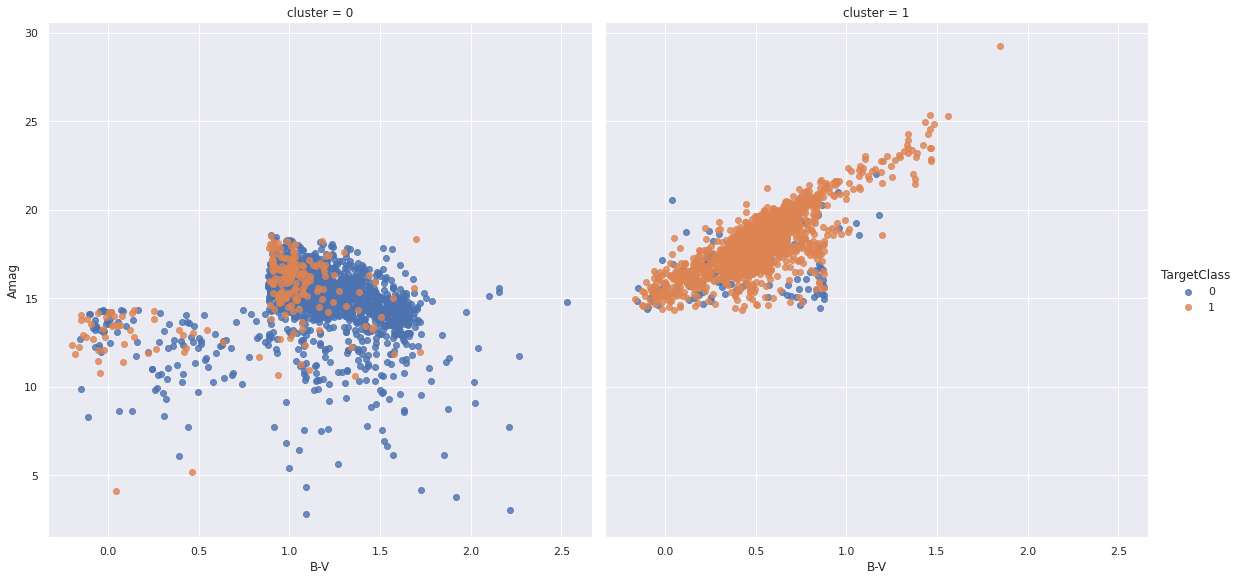

In [ ]:
#Mari kita lihat hasil klasifikasi kita
df['cluster'] = y_dt
sns_plot=sns.lmplot("B-V", "Amag", data=df, hue='TargetClass',
           col='cluster', fit_reg=False,height=8)

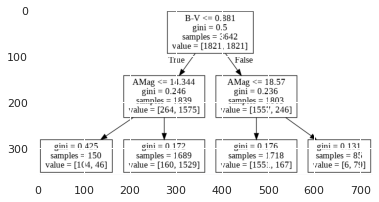

In [ ]:
#mari kita visualisasikan pohon keputusan kita
#import pydotplus untuk visualisasi
import pydotplus


#masukkan pohon keputusan ke dalam grafik
features=['B-V', 'AMag']
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('decisiontree_bintang.png')

#tampilkan. Kalau kurang besar, bisa didownload ke komputer/ hp
img=mpimg.imread('decisiontree_bintang.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#Dan seperti sebelumnya, kita buat confusion matrix0nya
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_bintang, y_dt)*100)
print(confusion_matrix(y_bintang, y_dt))
print(classification_report(y_bintang, y_dt))

89.59362987369576
[[1655  166]
 [ 213 1608]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1821
           1       0.91      0.88      0.89      1821

    accuracy                           0.90      3642
   macro avg       0.90      0.90      0.90      3642
weighted avg       0.90      0.90      0.90      3642



Dapat kita lihat bahwa nilai presisi dan recall yang kita dapat lebih baik dari logistic regression sebelumnya. Apakah bila kedalaman pohon keputusan berubah, hasil menjadi lebih baik?

**TUGAS**

1. Cobalah jenis logistic regression yang lain!
2. Cobalah beberapa nilai kedalaman pohon yang berbeda untuk pohon keputusan!
3. Cobalah melakukan klasifikasi dengan klasifier yang disebutkan sebelumnya, SVM. Bisa coba juga klasifier lainnya!
[Dokumentasi](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)  
[Perbandingan performa klasifier](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
4. Coba lakukan pembelajaran mesin dengan data lain!

SVM
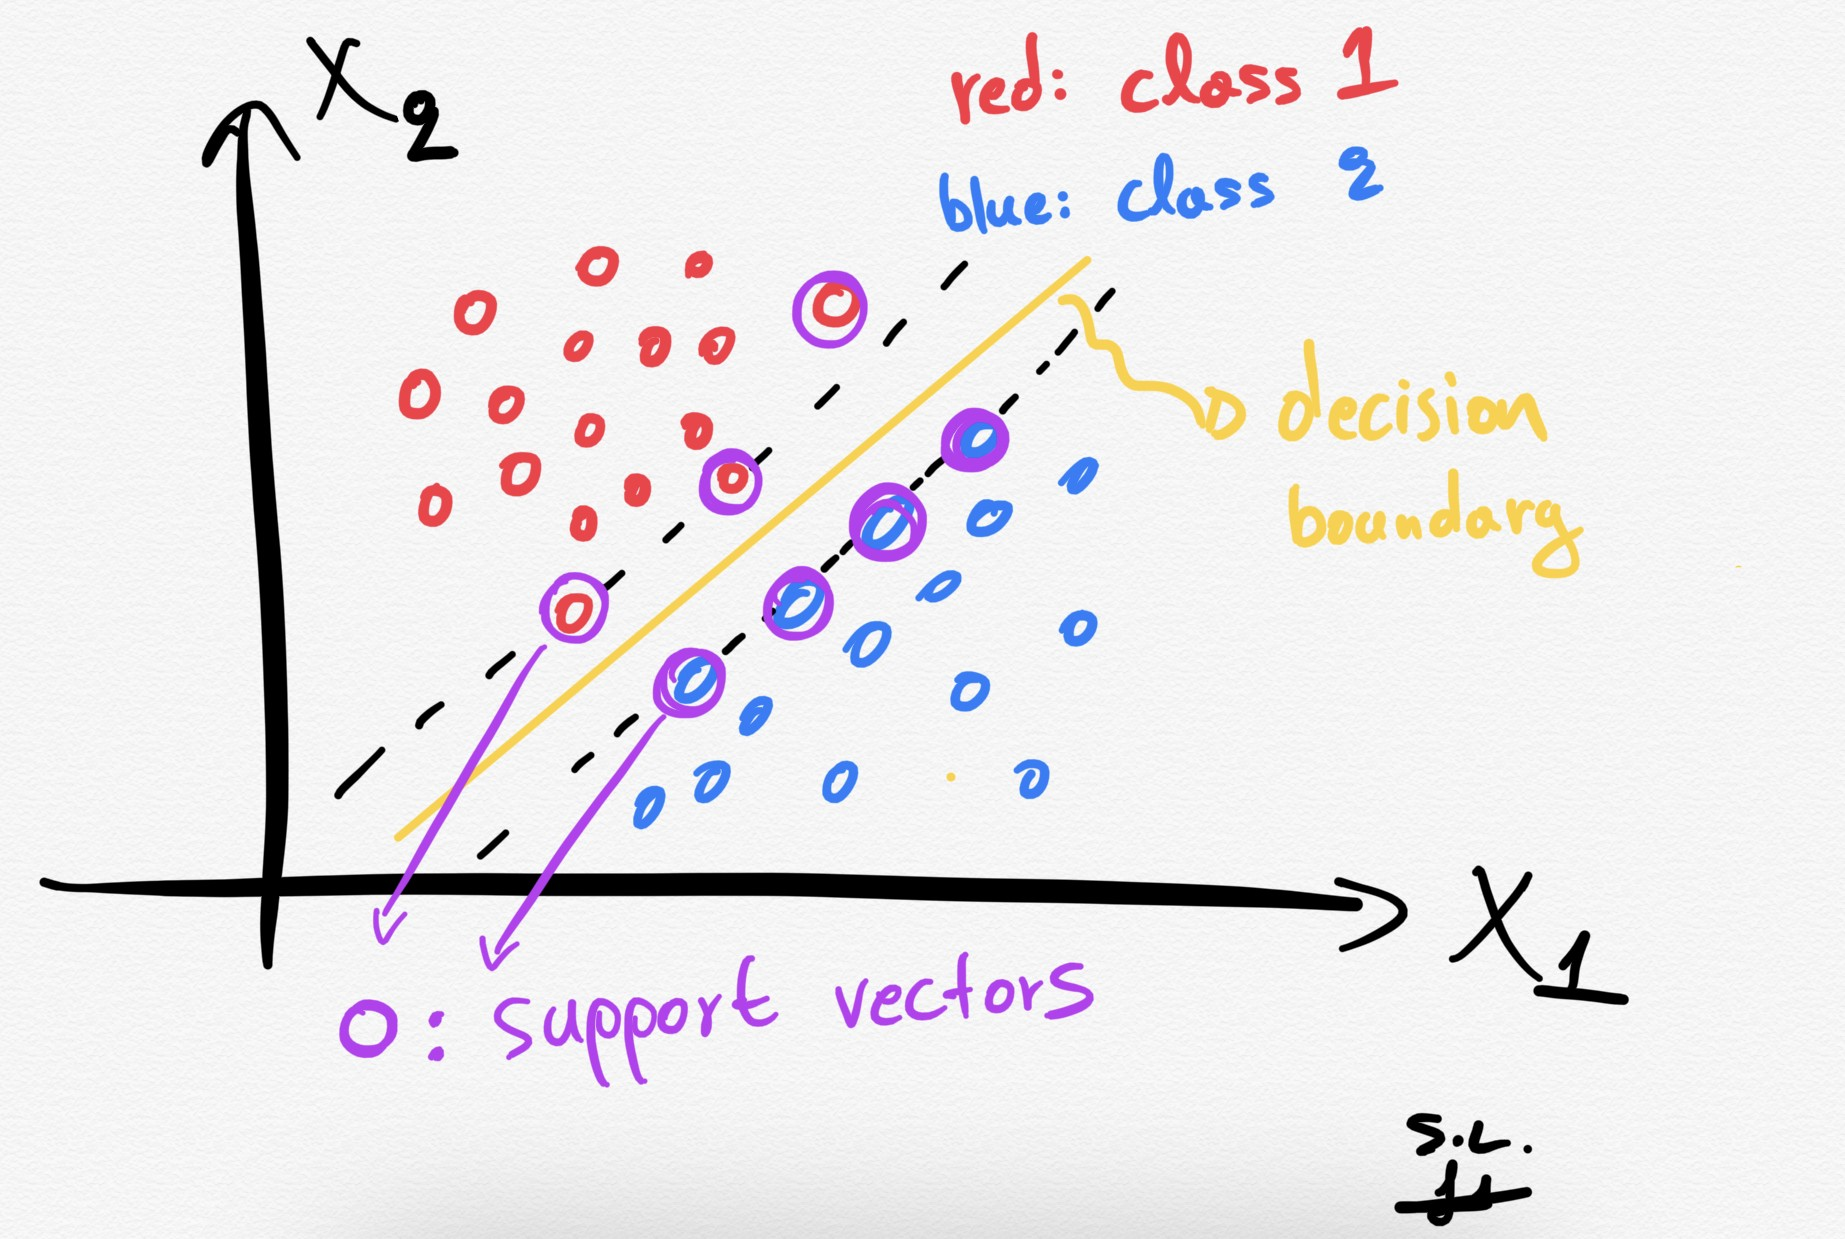


KNN
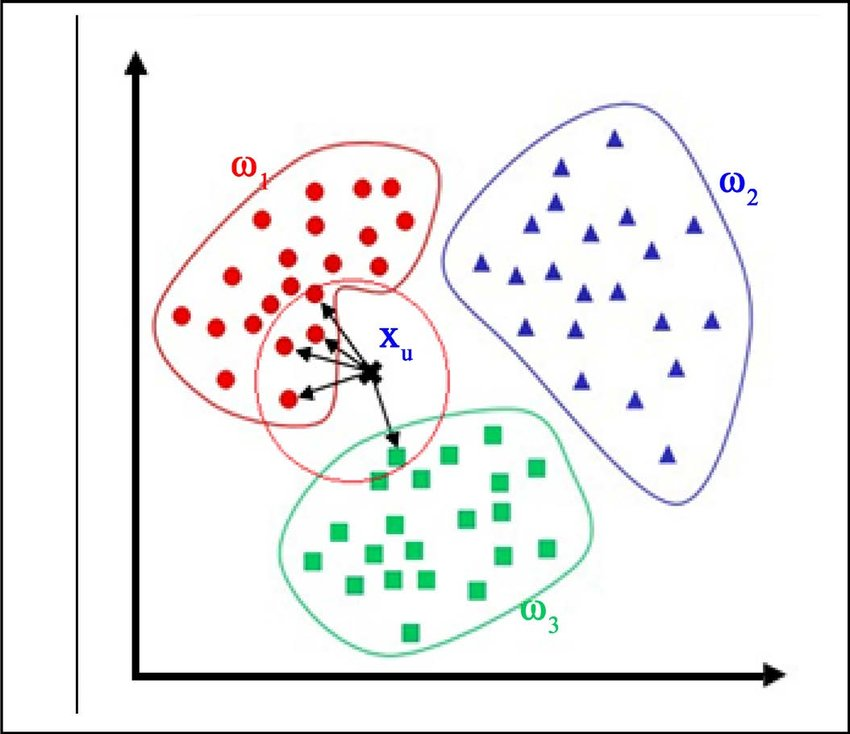

ANN
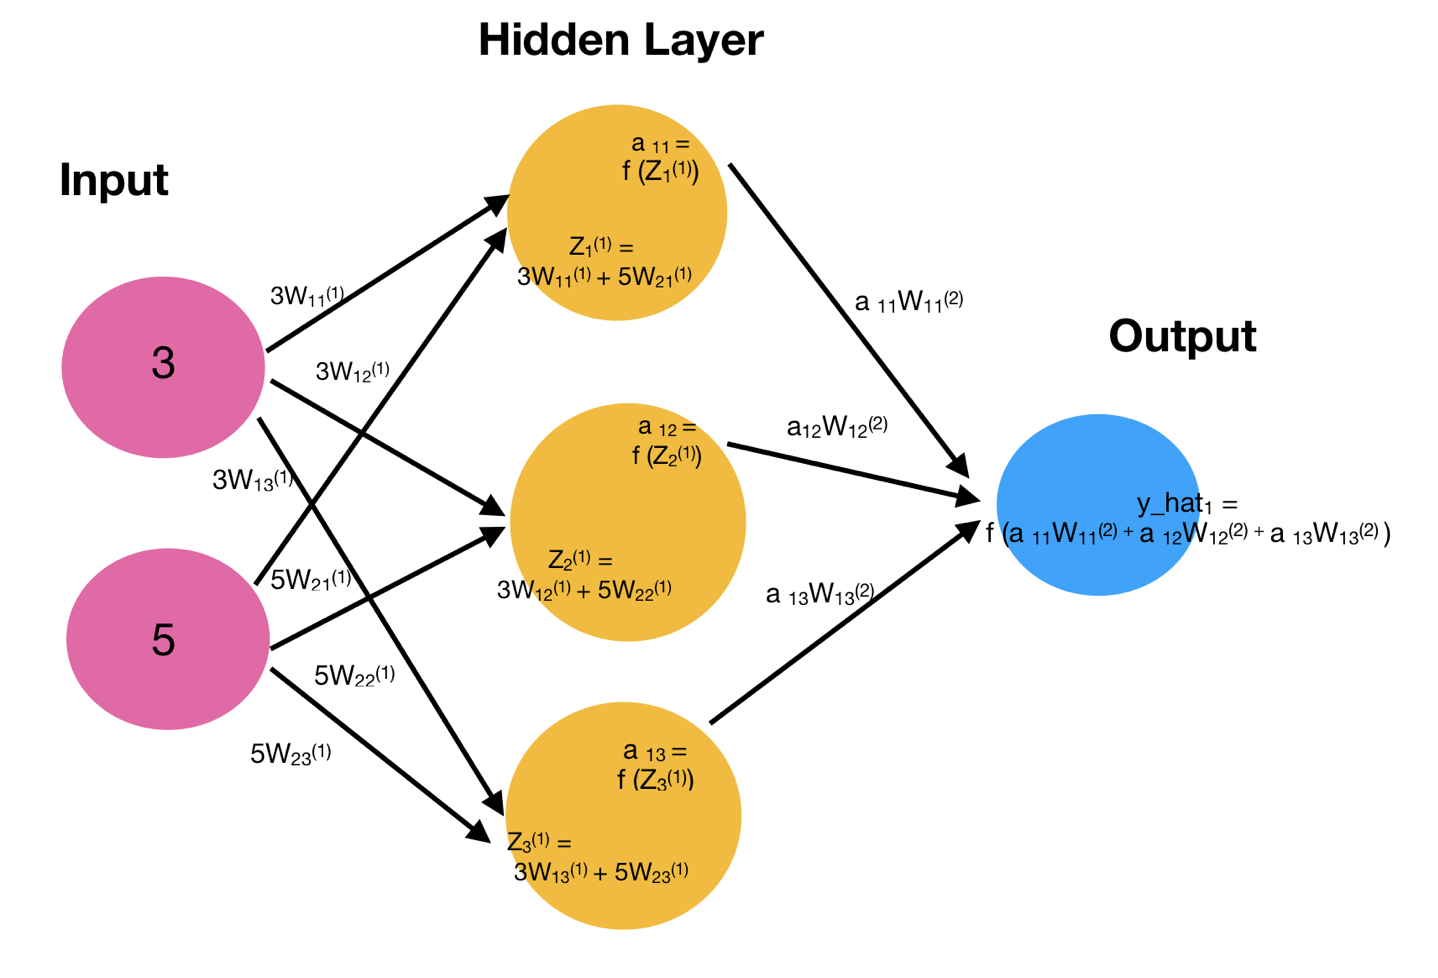

Kalau mau latihan-latihan lagi,

VanderPlas, "Python data science handbook", O'Reilly, 2017, ISBN 9781491912058
(Example code:[ https://github.com/jakevdp/PythonDataScienceHandbook](https://))

Geron, "Hands-on machine learning with Scikit-Learn and TensorFlow", O'Reilly, 2017, ISBN 9781491962299
(Example code: https://github.com/ageron/handson-ml))

Contoh dataset yang ada
 (https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research)